In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Summary

The data below consists of 10,000 observations of space taken by the SDSS (Sloan Digital Sky Survey). Every observation is described by 17 feature columns and 1 class column which identifies it to be either a star, galaxy or quasar. We will be considering this column as out target variable The Sloan Digital Sky Survey or SDSS is a major multi-spectral imaging and spectroscopic survey using a wide-angle optical telescope at Apache Point Observatory in New Mexico, United States to collect images and observations. The table results from a query which joins two tables "PhotoObj" which contains photometric data and "SpecObj" which contains spectral data.

### Calling DataFrame

In [2]:
#calling the entire dataframe
ds_space=pd.read_csv("Space.csv")
ds_space

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.237650e+18,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345,301,3,161,5.033450e+17,GALAXY,0.027583,447,51877,246
9996,1.237650e+18,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345,301,3,162,5.033400e+17,GALAXY,0.117772,447,51877,228
9997,1.237650e+18,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,1345,301,3,162,8.222620e+18,STAR,-0.000402,7303,57013,622
9998,1.237650e+18,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345,301,3,163,5.033400e+17,GALAXY,0.014019,447,51877,229


### Columnal Description

### Describing Information

In [3]:
ds_space.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


### Checking for Null Values

In [4]:
#checking for null values in the dataset 
ds_space.isnull().sum()

objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

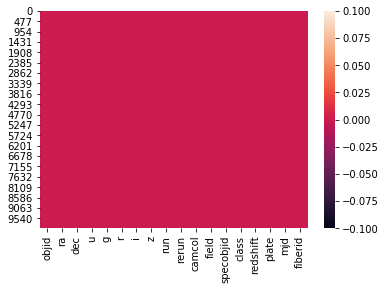

In [5]:
#plotting null values in a heatmap
sns.heatmap(ds_space.isnull())

### Encoding the Target Variable

In [6]:
#using label encoder to encode the month and the region columns
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
ds_space["class"]=le.fit_transform(ds_space["class"].astype(str))

In [7]:
#calling the dataframe after encoding
ds_space

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,2,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,2,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,0,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,2,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,2,0.000590,3306,54922,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.237650e+18,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345,301,3,161,5.033450e+17,0,0.027583,447,51877,246
9996,1.237650e+18,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345,301,3,162,5.033400e+17,0,0.117772,447,51877,228
9997,1.237650e+18,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,1345,301,3,162,8.222620e+18,2,-0.000402,7303,57013,622
9998,1.237650e+18,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345,301,3,163,5.033400e+17,0,0.014019,447,51877,229


### Dropping Columns

In [8]:
#we will be droppin the lesser important columns which we will not consider in making the model.
ds_space.drop("objid",inplace=True,axis=1)
ds_space.drop("rerun",inplace=True,axis=1)
ds_space.drop("specobjid",inplace=True,axis=1)
ds_space.drop("fiberid",inplace=True,axis=1)

In [9]:
#caling dataframe after removing lesser important columns
ds_space

,ra,dec,u,g,r,i,z,run,camcol,field,class,redshift,plate,mjd
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,4,267,2,-0.000009,3306,54922
1,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,4,267,2,-0.000055,323,51615
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,4,268,0,0.123111,287,52023
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,4,269,2,-0.000111,3306,54922
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,4,269,2,0.000590,3306,54922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345,3,161,0,0.027583,447,51877
9996,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345,3,162,0,0.117772,447,51877
9997,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,1345,3,162,2,-0.000402,7303,57013
9998,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345,3,163,0,0.014019,447,51877


### Describing Statistics

In [10]:
#describing statistical information of the dataset
ds_space.describe()

,ra,dec,u,g,r,i,z,run,camcol,field,class,redshift,plate,mjd
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,3.648700,302.380100,0.915400,0.143726,1460.986400,52943.533300
std,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,1.666183,162.577763,0.952856,0.388774,1788.778371,1511.150651
min,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,1.000000,11.000000,0.000000,-0.004136,266.000000,51578.000000
25%,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,2.000000,184.000000,0.000000,0.000081,301.000000,51900.000000
50%,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,4.000000,299.000000,1.000000,0.042591,441.000000,51997.000000
75%,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,5.000000,414.000000,2.000000,0.092579,2559.000000,54468.000000
max,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,6.000000,768.000000,2.000000,5.353854,8410.000000,57481.000000


### Plotting Correlation

In [11]:
#describing the correlation of all variables with one another.
ds_space.corr()

,ra,dec,u,g,r,i,z,run,camcol,field,class,redshift,plate,mjd
ra,1.000000,0.003596,0.031238,0.043909,0.047103,0.045731,0.042950,-0.092741,-0.006294,0.594700,-0.043219,0.030307,-0.095329,-0.086887
dec,0.003596,1.000000,0.035279,0.061875,0.063404,0.058292,0.056870,0.778385,0.114614,-0.131471,-0.058918,0.067021,0.088342,0.066147
u,0.031238,0.035279,1.000000,0.849232,0.692379,0.602630,0.551483,0.038229,0.009945,0.008548,-0.269044,0.163741,-0.129430,-0.168793
g,0.043909,0.061875,0.849232,1.000000,0.958106,0.907419,0.879622,0.058446,0.010223,0.014651,-0.099212,0.407576,-0.054981,-0.092772
r,0.047103,0.063404,0.692379,0.958106,1.000000,0.977672,0.969197,0.057261,0.010747,0.017133,0.049628,0.441080,0.019787,-0.009345
i,0.045731,0.058292,0.602630,0.907419,0.977672,1.000000,0.981507,0.049765,0.013461,0.019781,0.146791,0.431450,0.072958,0.050896
z,0.042950,0.056870,0.551483,0.879622,0.969197,0.981507,1.000000,0.048252,0.010930,0.018248,0.215758,0.424034,0.112397,0.095658
run,-0.092741,0.778385,0.038229,0.058446,0.057261,0.049765,0.048252,1.000000,0.151814,-0.463898,-0.078162,0.059056,0.093601,0.070354
camcol,-0.006294,0.114614,0.009945,0.010223,0.010747,0.013461,0.010930,0.151814,1.000000,-0.067921,-0.006186,0.006834,0.040795,0.026284
field,0.594700,-0.131471,0.008548,0.014651,0.017133,0.019781,0.018248,-0.463898,-0.067921,1.000000,0.007713,0.015414,-0.093723,-0.086558


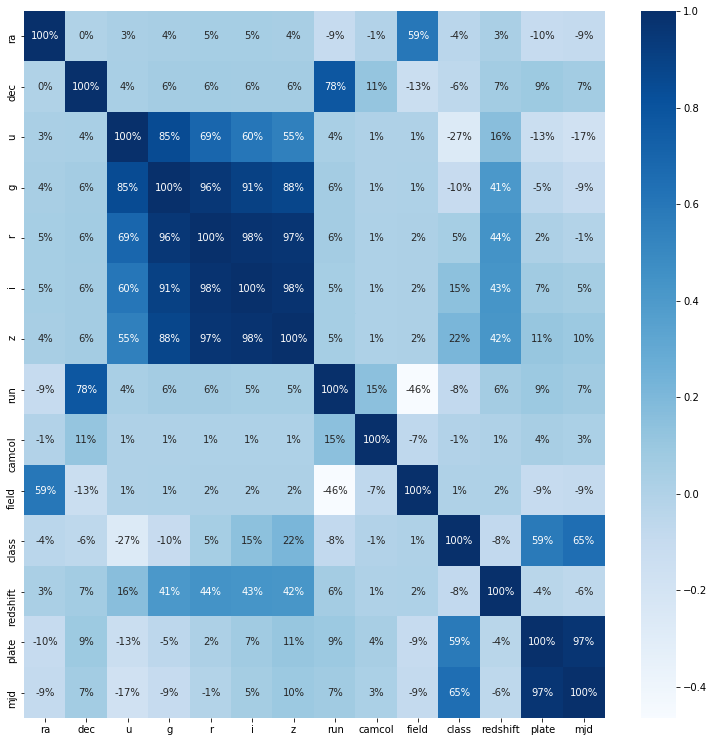

In [12]:
#plotting correlation in a heatmap
corr_hmap=ds_space.corr()
plt.figure(figsize=(13,13))
sns.heatmap(corr_hmap,annot=True,fmt=".0%",cmap="Blues")
plt.show()

Text(0.5, 1.0, 'Correlation wih target variable')

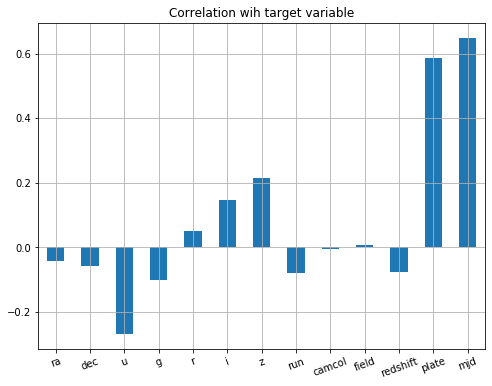

In [13]:
#plotting a corelation graph
plt.figure(figsize=(8,6))
ds_space.drop("class",axis=1).corrwith(ds_space["class"]).plot(kind="bar",grid=True)
plt.xticks(rotation=20)
plt.title("Correlation wih target variable")

### Univariate Analysis

756     3060
752     2086
1345     915
1350     540
1140     527
745      453
1035     396
1412     347
1302     246
1331     245
1231     245
1334     212
1239     197
1336     182
1404     137
1045     112
1402      49
308       31
1411      10
1356       4
727        4
1119       1
1332       1
Name: run, dtype: int64


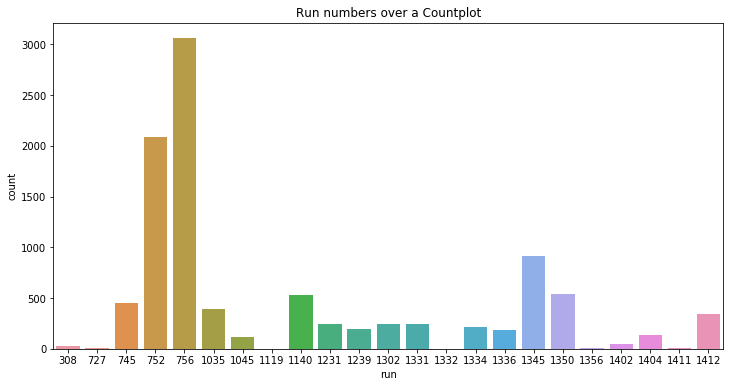

In [14]:
#plotting runs in a countplot
plt.figure(figsize=(12,6))
plt.title("Run numbers over a Countplot")
sns.countplot(x="run",data=ds_space)
print(ds_space.run.value_counts())

4    1834
5    1827
6    1769
2    1712
3    1560
1    1298
Name: camcol, dtype: int64


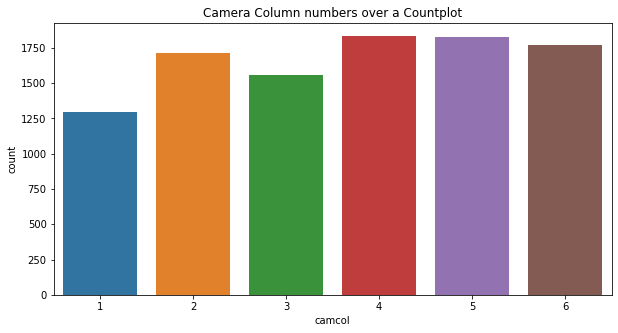

In [15]:
#plotting camera columns in a countplot
plt.figure(figsize=(10,5))
plt.title("Camera Column numbers over a Countplot")
sns.countplot(x="camcol",data=ds_space)
print(ds_space.camcol.value_counts())

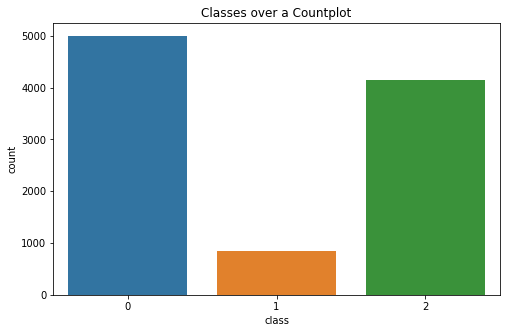

In [16]:
#plotting camera columns in a countplot
plt.figure(figsize=(8,5))
plt.title("Classes over a Countplot")
sns.countplot(x="class",data=ds_space)

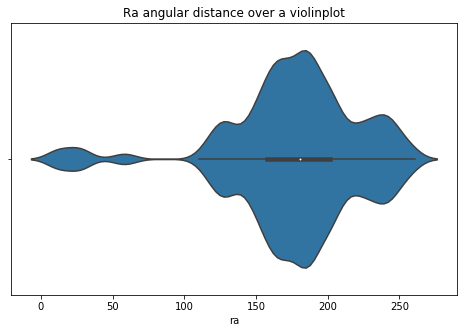

In [17]:
#plotting angular distance over a violinplot
plt.figure(figsize=(8,5))
plt.title("Ra angular distance over a violinplot")
sns.violinplot(x="ra",data=ds_space)

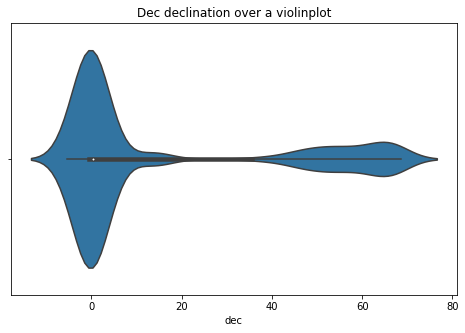

In [18]:
#plotting declination over a violinplot
plt.figure(figsize=(8,5))
plt.title("Dec declination over a violinplot")
sns.violinplot(x="dec",data=ds_space)

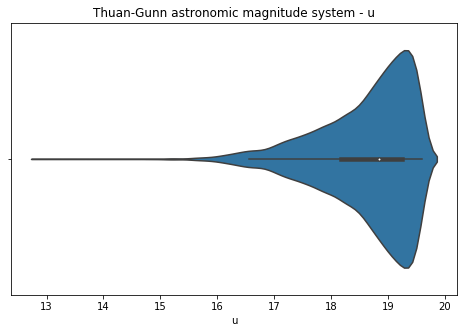

In [19]:
#plotting Thuan-Gunn astronomic magnitude system over a violinplot
plt.figure(figsize=(8,5))
plt.title("Thuan-Gunn astronomic magnitude system - u")
sns.violinplot(x="u",data=ds_space)

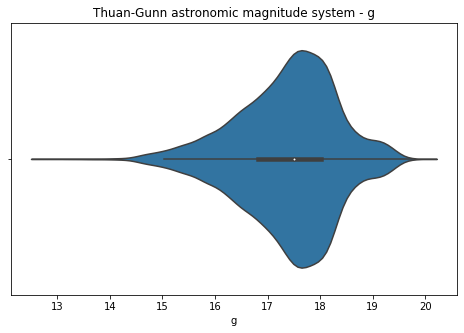

In [20]:
#plotting Thuan-Gunn astronomic magnitude system over a violinplot
plt.figure(figsize=(8,5))
plt.title("Thuan-Gunn astronomic magnitude system - g")
sns.violinplot(x="g",data=ds_space)

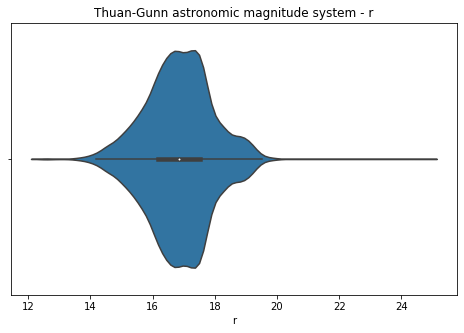

In [21]:
#plotting Thuan-Gunn astronomic magnitude system over a violinplot
plt.figure(figsize=(8,5))
plt.title("Thuan-Gunn astronomic magnitude system - r")
sns.violinplot(x="r",data=ds_space)

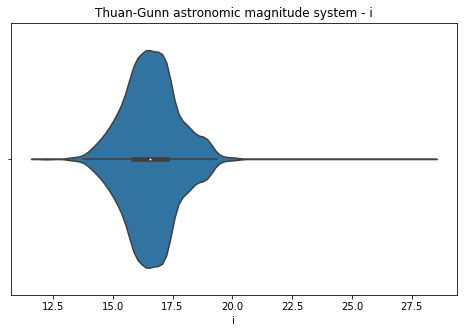

In [22]:
#plotting Thuan-Gunn astronomic magnitude system over a violinplot
plt.figure(figsize=(8,5))
plt.title("Thuan-Gunn astronomic magnitude system - i")
sns.violinplot(x="i",data=ds_space)

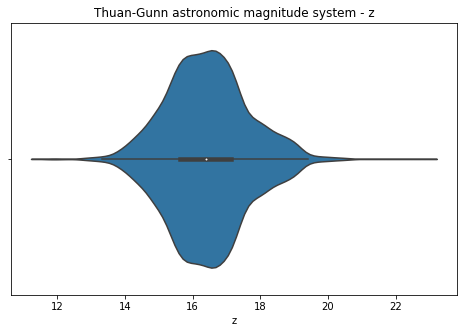

In [23]:
#plotting Thuan-Gunn astronomic magnitude system over a violinplot
plt.figure(figsize=(8,5))
plt.title("Thuan-Gunn astronomic magnitude system - z")
sns.violinplot(x="z",data=ds_space)

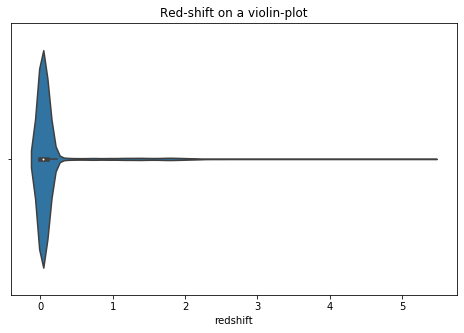

In [24]:
#plotting redshift over a violinplot
plt.figure(figsize=(8,5))
plt.title("Red-shift on a violin-plot")
sns.violinplot(x="redshift",data=ds_space)

### Bivariate Analysis

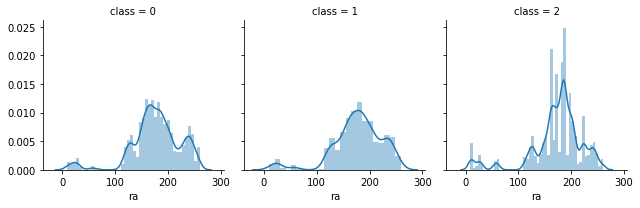

In [25]:
#plotting "ra" over a facetgrid
facet=sns.FacetGrid(ds_space,col="class")
facet.map(sns.distplot,"ra")
plt.show()

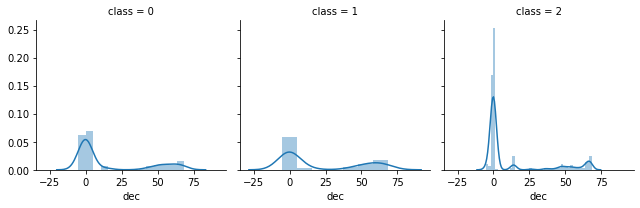

In [26]:
#plotting "dec" over a facetgrid
facet=sns.FacetGrid(ds_space,col="class")
facet.map(sns.distplot,"dec")
plt.show()

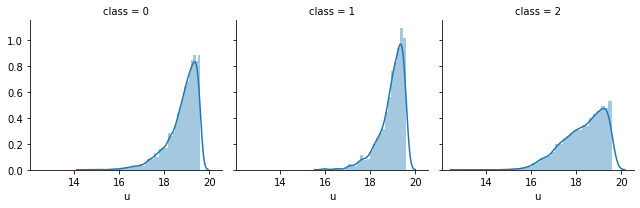

In [27]:
#plotting "u" over a facetgrid
facet=sns.FacetGrid(ds_space,col="class")
facet.map(sns.distplot,"u")
plt.show()

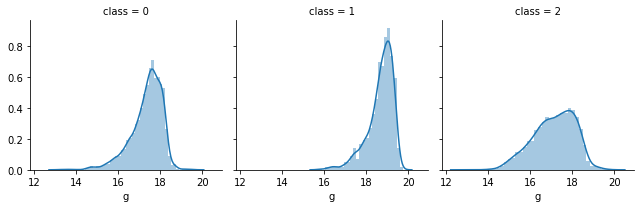

In [28]:
#plotting "g" over a facetgrid
facet=sns.FacetGrid(ds_space,col="class")
facet.map(sns.distplot,"g")
plt.show()

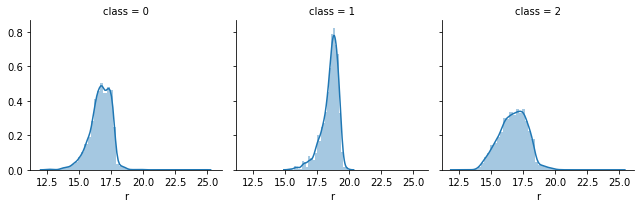

In [29]:
#plotting "r" over a facetgrid
facet=sns.FacetGrid(ds_space,col="class")
facet.map(sns.distplot,"r")
plt.show()

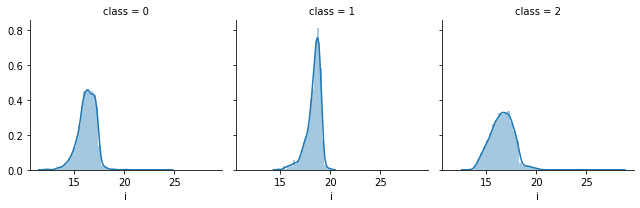

In [30]:
#plotting "i" over a facetgrid
facet=sns.FacetGrid(ds_space,col="class")
facet.map(sns.distplot,"i")
plt.show()

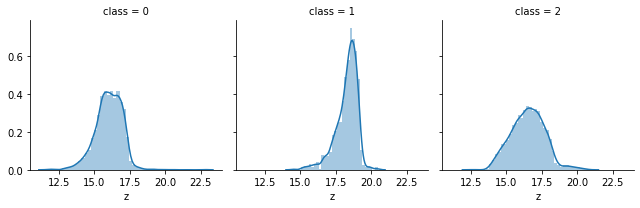

In [31]:
#plotting "z" over a facetgrid
facet=sns.FacetGrid(ds_space,col="class")
facet.map(sns.distplot,"z")
plt.show()

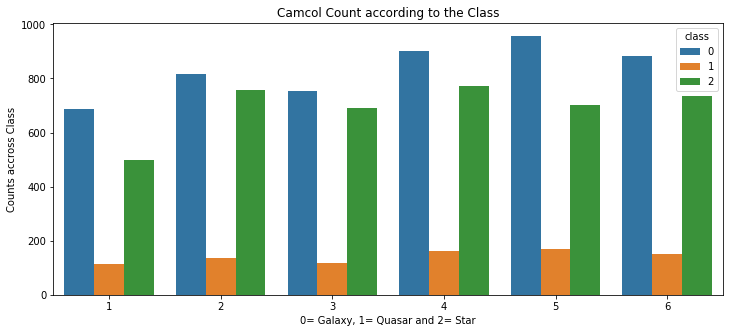

In [32]:
#plotting camcol accross classes over a countplot
plt.figure(figsize=(12,5))
sns.countplot(x="camcol",hue="class",data=ds_space)
plt.title("Camcol Count according to the Class")
plt.xlabel("0= Galaxy, 1= Quasar and 2= Star")
plt.ylabel("Counts accross Class")
plt.show()

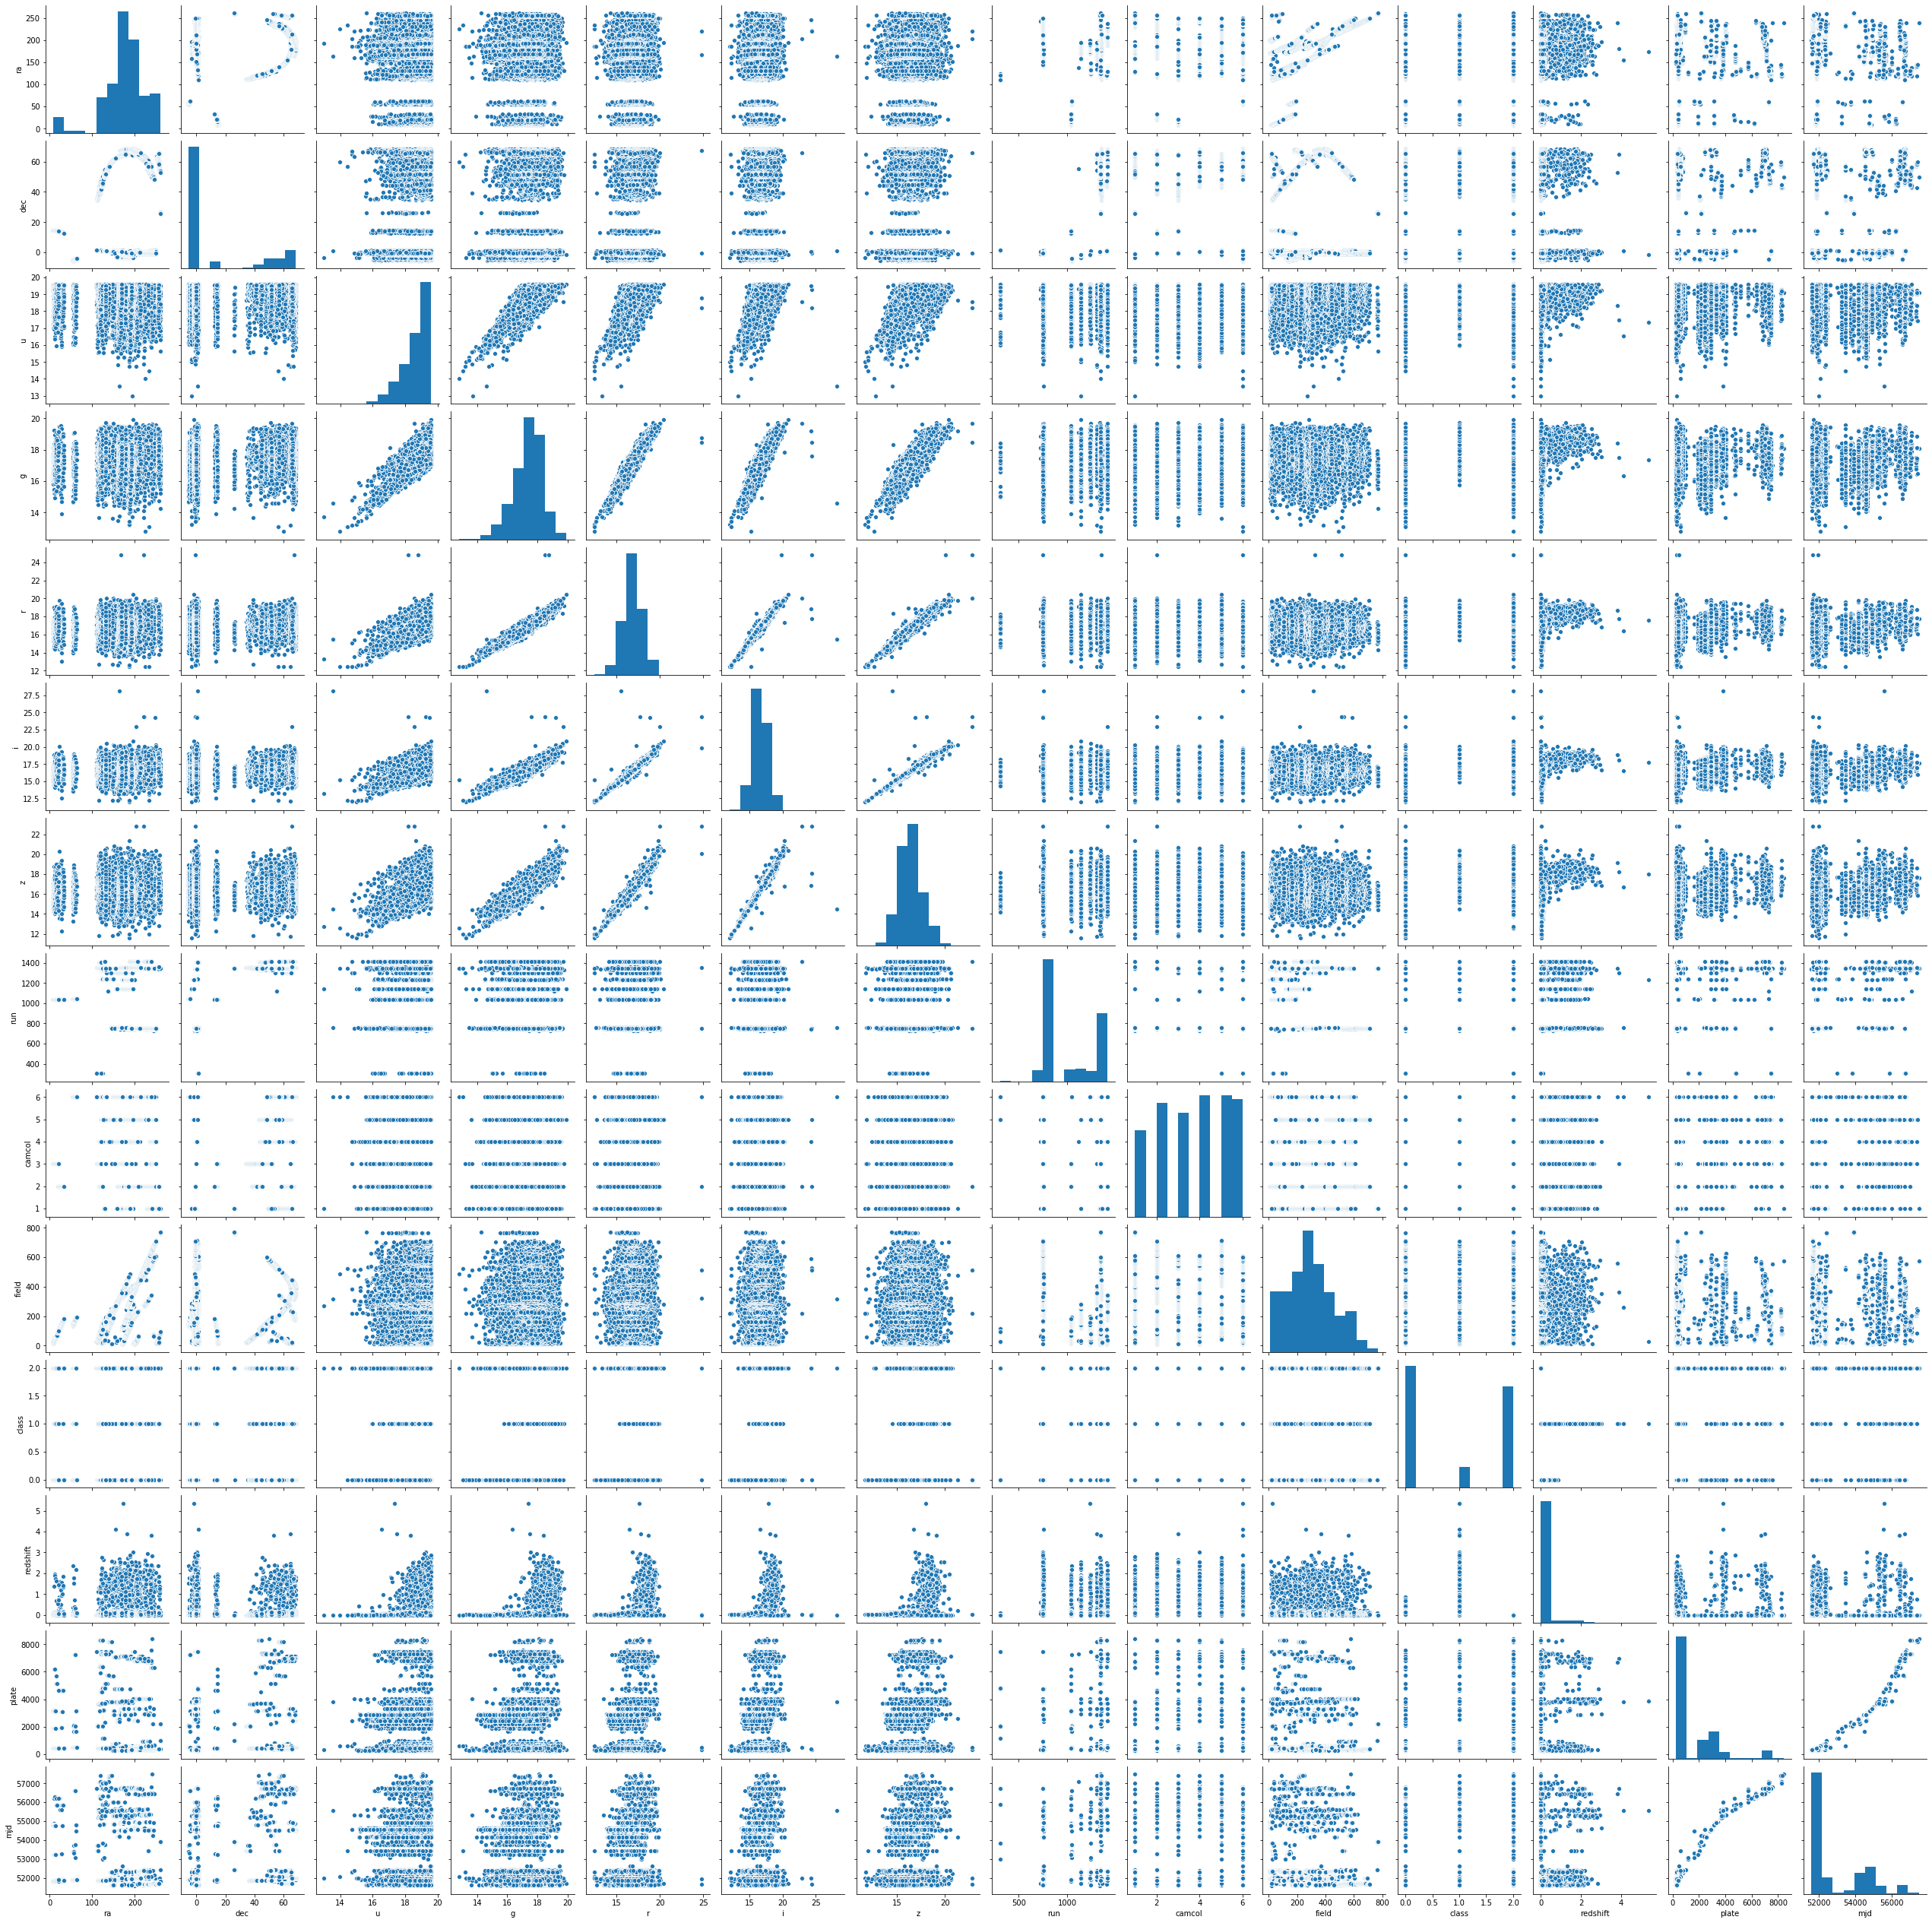

In [33]:
#plotting a pairplot to show relationship of all the variables with one another
sns.pairplot(ds_space)

### Plotting Outliers

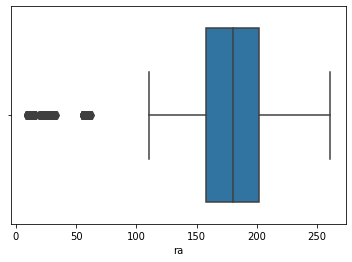

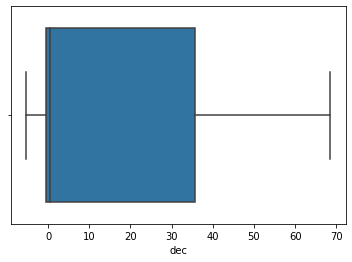

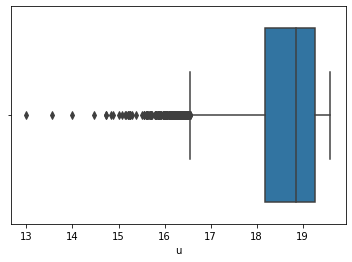

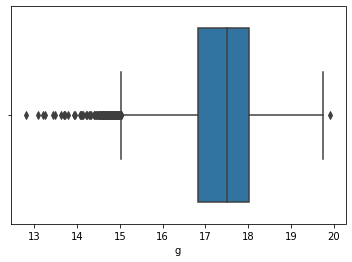

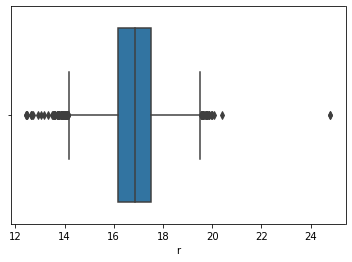

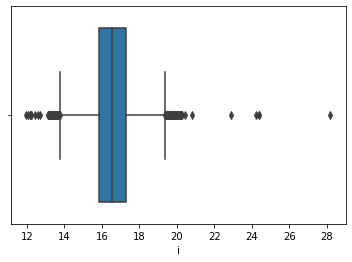

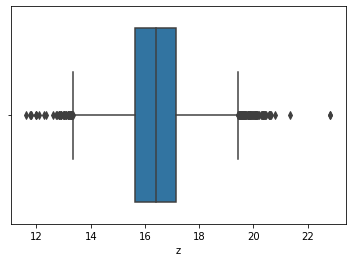

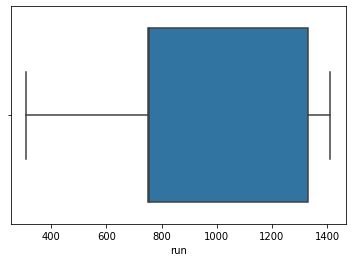

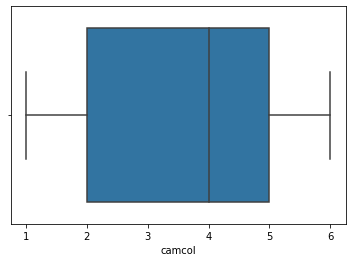

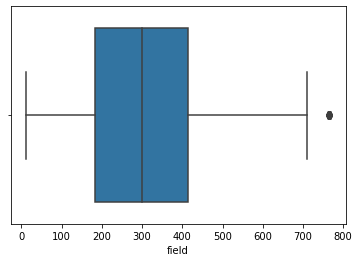

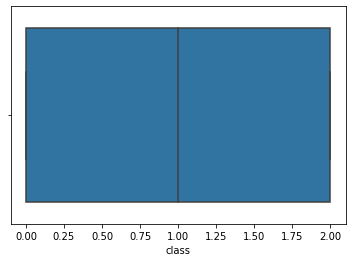

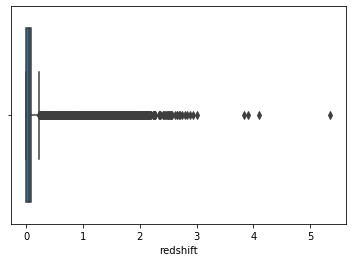

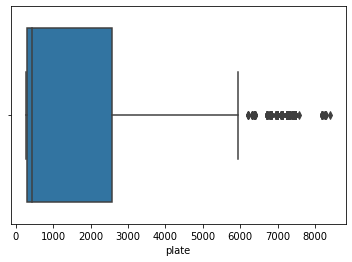

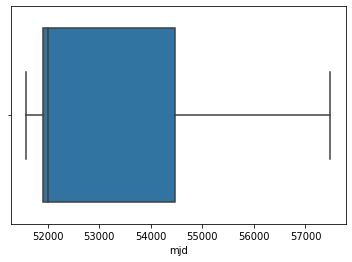

In [34]:
#plotting all the variables in a boxplot to find outliers
for i in ds_space.columns:
    plt.figure()
    sns.boxplot(ds_space[i])

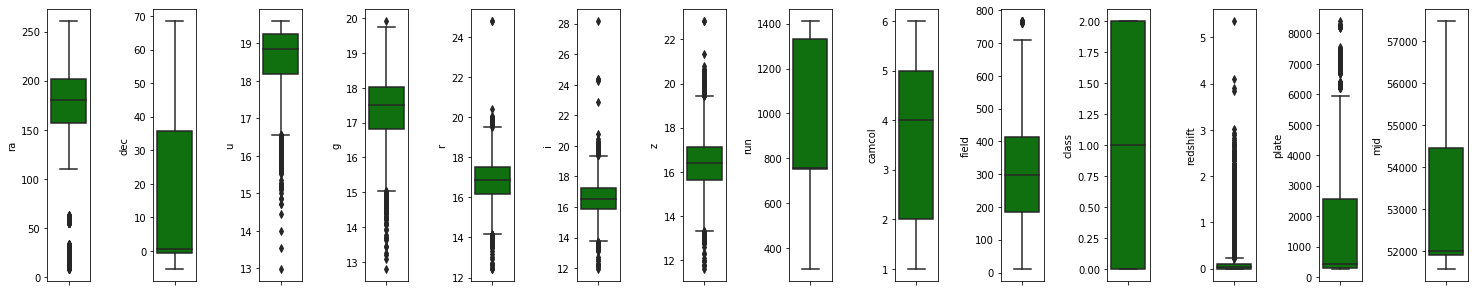

In [35]:
#plotting outliers for all the variables in a single view format for a better understanding
collist=ds_space.columns.values
ncol=17
nrow=10
plt.figure(figsize=(25,40))
for i in range(0,len(collist)):
    plt.subplot(nrow,ncol,i+1)
    sns.boxplot(ds_space[collist[i]],color="green",orient="v")
    plt.tight_layout()

### Plotting Distribution

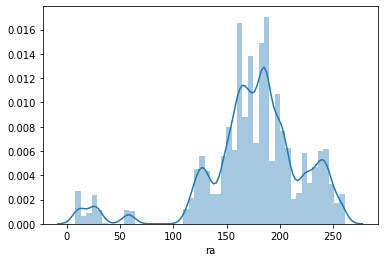

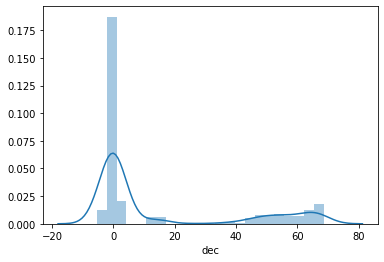

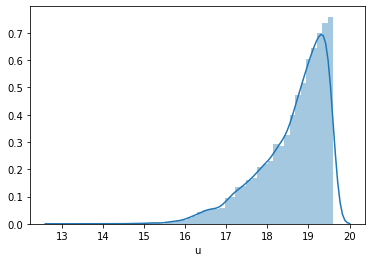

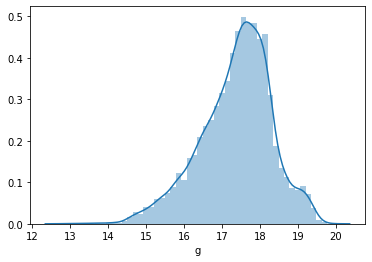

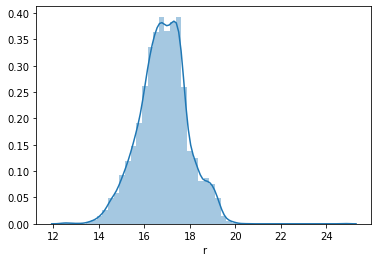

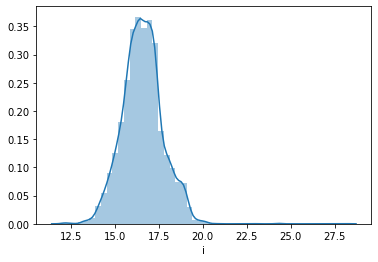

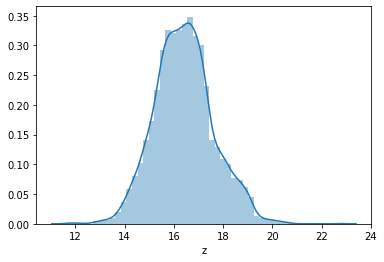

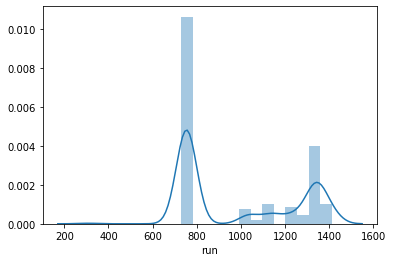

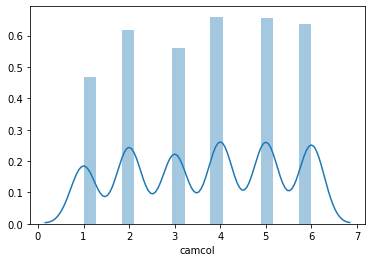

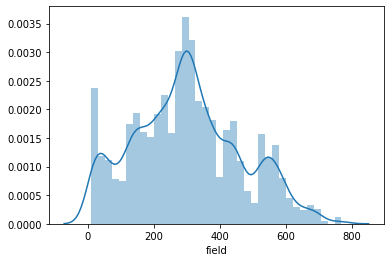

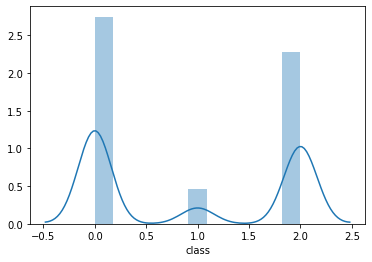

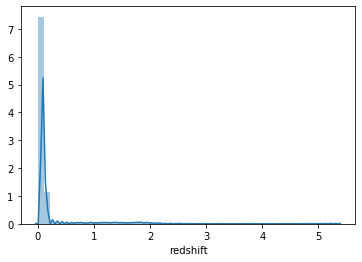

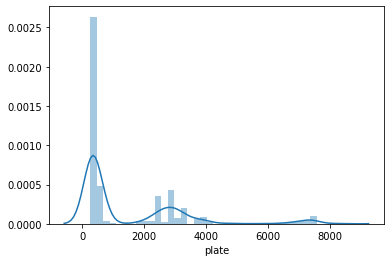

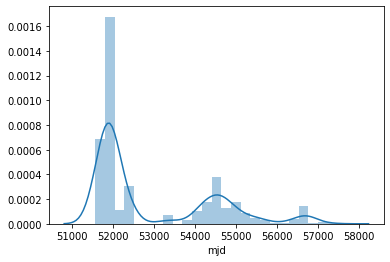

In [36]:
#plotting distribution of the variabels 
for i in ds_space.columns:
    plt.figure()
    sns.distplot(ds_space[i])

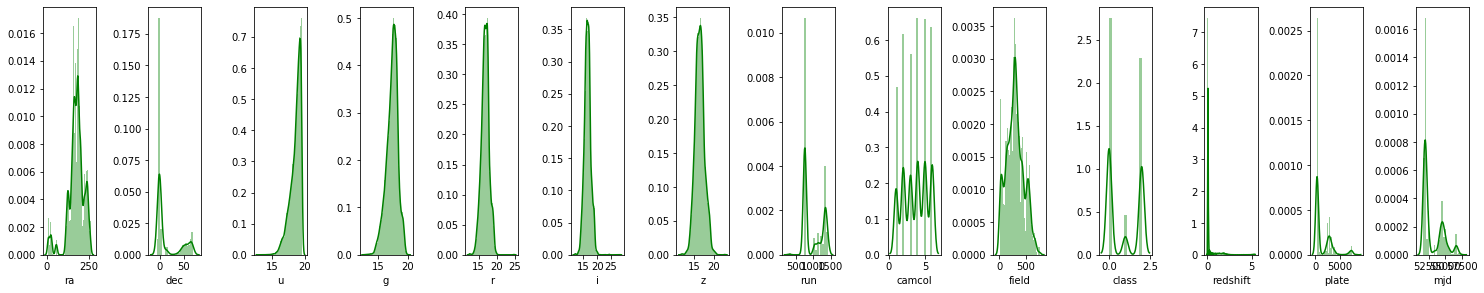

In [37]:
#plotting distribution for all the variables in a single view format for a better understanding
plt.figure(figsize=(25,40))
for i in range(0,len(collist)):
    plt.subplot(nrow,ncol,i+1)
    sns.distplot(ds_space[collist[i]],color="green")
    plt.tight_layout()

### Checking Skewness

In [38]:
#checking skewness of the data
ds_space.skew()

ra         -1.227350
dec         1.191544
u          -1.219795
g          -0.536293
r          -0.021673
i           0.286442
z           0.214313
run         0.412555
camcol     -0.100220
field       0.249795
class       0.169292
redshift    4.265729
plate       1.794609
mjd         1.039610
dtype: float64

###  Fixing Outliers

In [39]:
#using Zscore to remove the outliers
from scipy.stats import zscore
z=np.abs(zscore(ds_space))
threshold=3
print(np.where(z>3))
ds_space_new=ds_space[(z<3).all(axis=1)]
print(ds_space.shape)
print(ds_space_new.shape)

(array([  45,  109,  129, ..., 9992, 9994, 9997], dtype=int64), array([11, 11, 11, ..., 12, 12, 12], dtype=int64))
(10000, 14)
(8713, 14)


### Fixing Skewness

In [40]:
#using log transformation technique to reduce data skewness
for i in ds_space_new.columns:
    if ds_space_new[i].skew()>.55:
        ds_space_new[i]=np.log1p(ds_space_new[i])

### Re_checking Skewness

In [41]:
#checking skewness of the data
ds_space_new.skew()

ra         -0.131080
dec         0.256002
u          -0.982213
g          -0.528614
r          -0.151366
i           0.059073
z           0.170787
run         0.517015
camcol     -0.143107
field       0.220889
class       0.289700
redshift    4.192822
plate       0.747211
mjd         0.945443
dtype: float64

### Re-Plotting Distribution

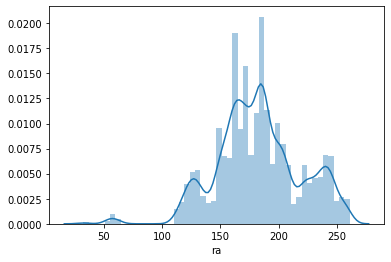

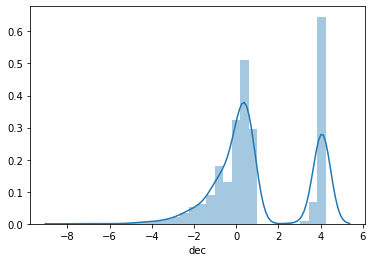

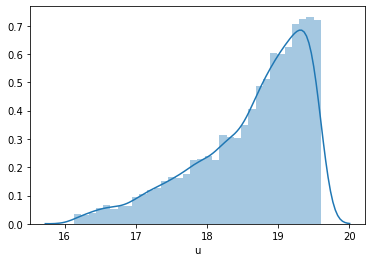

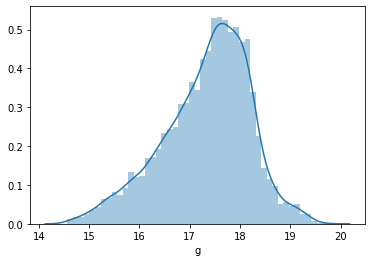

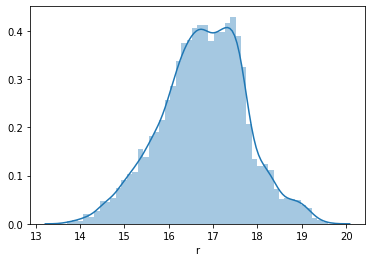

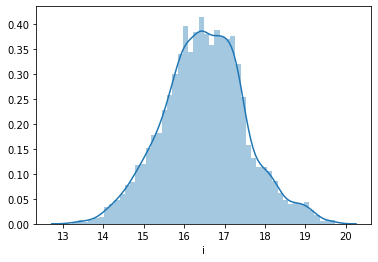

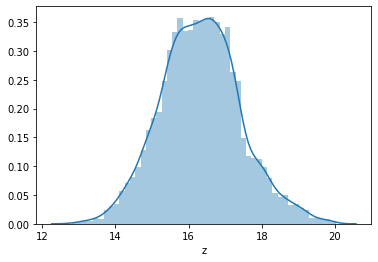

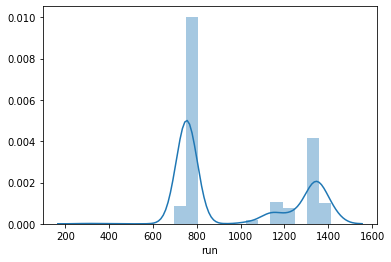

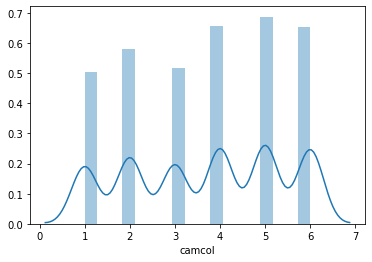

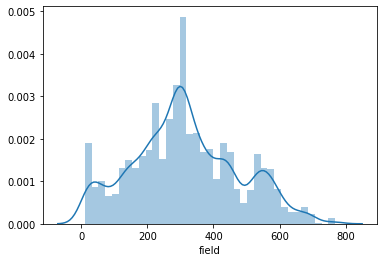

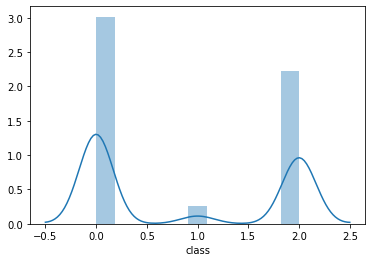

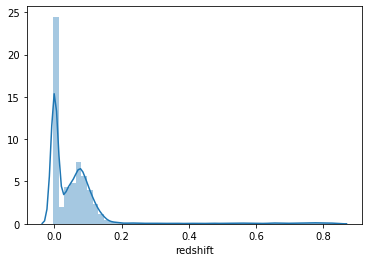

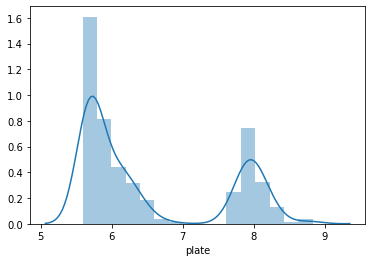

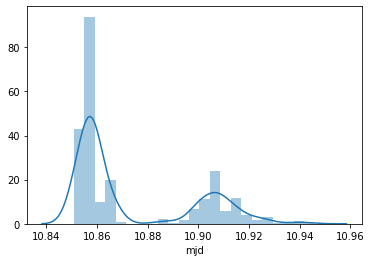

In [42]:
#plotting distribution of the variabels 
for i in ds_space_new.columns:
    plt.figure()
    sns.distplot(ds_space_new[i])

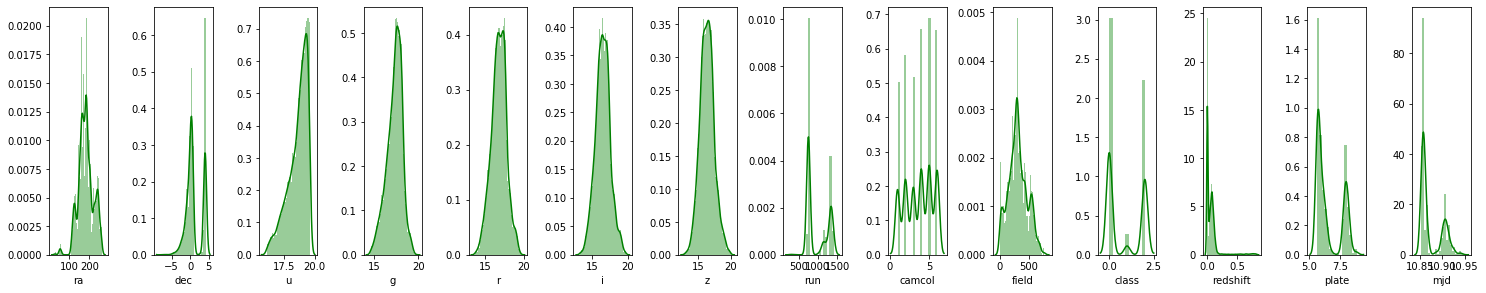

In [43]:
#plotting distribution for all the variables in a single view format for a better understanding
plt.figure(figsize=(25,40))
for i in range(0,len(collist)):
    plt.subplot(nrow,ncol,i+1)
    sns.distplot(ds_space_new[collist[i]],color="green")
    plt.tight_layout()

### Re-Plotting Outliers

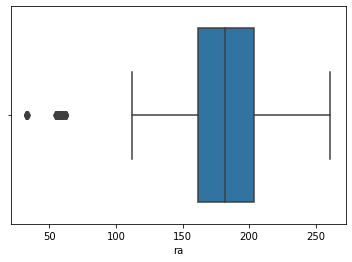

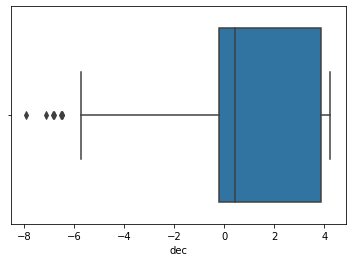

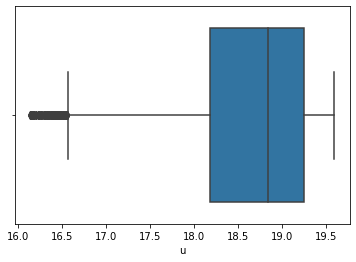

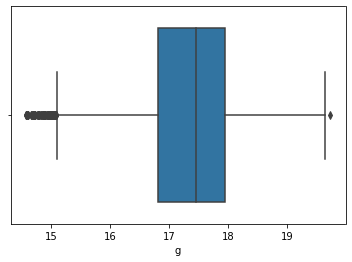

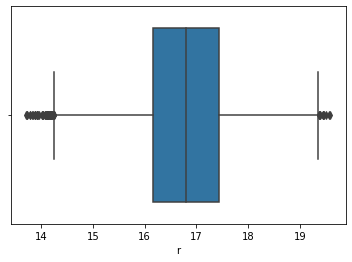

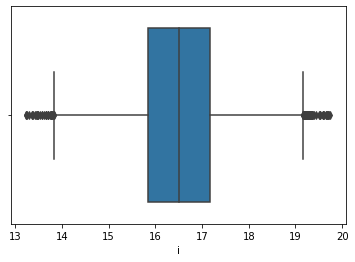

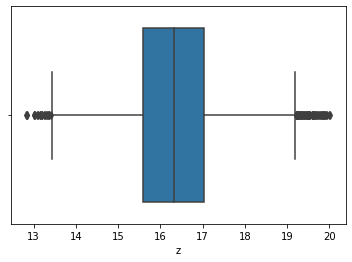

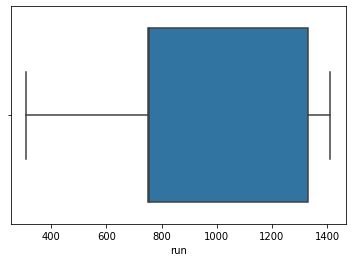

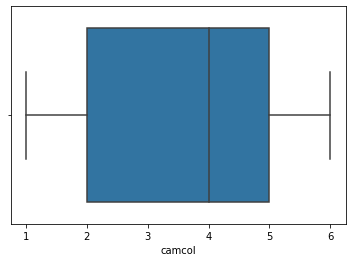

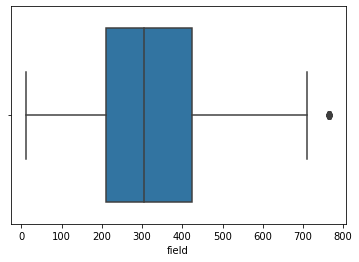

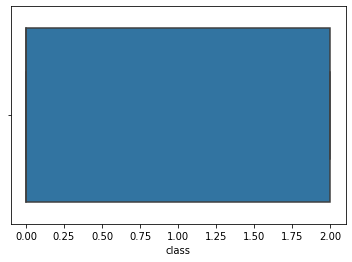

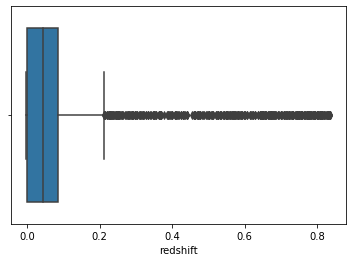

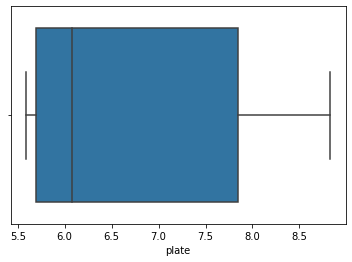

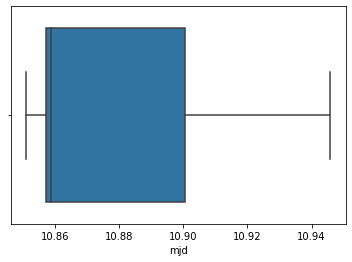

In [44]:
#plotting all the variables in a boxplot to find outliers
for i in ds_space_new.columns:
    plt.figure()
    sns.boxplot(ds_space_new[i])

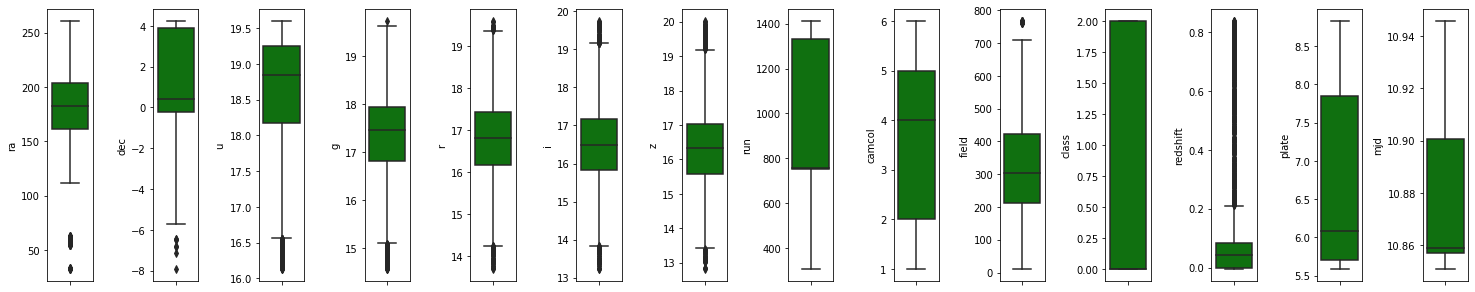

In [45]:
#plotting outliers for all the variables in a single view format for a better understanding
collist=ds_space_new.columns.values
ncol=17
nrow=10
plt.figure(figsize=(25,40))
for i in range(0,len(collist)):
    plt.subplot(nrow,ncol,i+1)
    sns.boxplot(ds_space_new[collist[i]],color="green",orient="v")
    plt.tight_layout()

### Splitting Input and Target Variable

In [46]:
#splitting the data into target and input variable for the regression study  
ds_space_x=ds_space_new.drop(columns="class")
y=pd.DataFrame(ds_space_new["class"])

In [47]:
#calling the input dataframe
ds_space_x

,ra,dec,u,g,r,i,z,run,camcol,field,redshift,plate,mjd
0,183.531326,0.085896,19.47406,17.04240,15.94699,15.50342,15.22531,752,4,267,-0.000009,8.103797,10.913687
1,183.598371,0.126884,18.66280,17.21449,16.67637,16.48922,16.39150,752,4,267,-0.000055,5.780744,10.851587
2,183.680207,0.118836,19.38298,18.19169,17.47428,17.08732,16.80125,752,4,268,0.116103,5.662960,10.859460
3,183.870529,0.048705,17.76536,16.60272,16.16116,15.98233,15.90438,752,4,269,-0.000111,8.103797,10.913687
4,183.883288,0.097632,17.55025,16.26342,16.43869,16.55492,16.61326,752,4,269,0.000590,8.103797,10.913687
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,131.398915,3.961455,17.79613,16.02621,15.15955,14.71488,14.33840,1345,3,161,0.054029,6.104793,10.856650
9995,131.316413,3.961566,18.81777,17.47053,16.91508,16.68305,16.50570,1345,3,161,0.027209,6.104793,10.856650
9996,131.306083,3.964071,18.27255,17.43849,17.07692,16.71661,16.69897,1345,3,162,0.111338,6.104793,10.856650
9998,131.477151,3.965622,18.88287,17.91068,17.53152,17.36284,17.13988,1345,3,163,0.013922,6.104793,10.856650


In [48]:
#calling the target dataframe
y

,class
0,2
1,2
2,0
3,2
4,2
...,...
9993,0
9995,0
9996,0
9998,0


### Scaling Input Variables

In [49]:
#using standard scaler to scale input variables
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(ds_space_x)
x=pd.DataFrame(x,columns=ds_space_x.columns)
x

,ra,dec,u,g,r,i,z,run,camcol,field,redshift,plate,mjd
0,0.022775,-0.436589,1.076099,-0.334348,-0.856168,-0.970559,-1.008185,-0.790047,0.196543,-0.304250,-0.553642,1.567498,1.656504
1,0.024634,-0.417399,0.039036,-0.135699,-0.099937,-0.011434,0.053472,-0.790047,0.196543,-0.304250,-0.554027,-0.733674,-0.892402
2,0.026903,-0.421167,0.959668,0.992312,0.727347,0.570482,0.426493,-0.790047,0.196543,-0.297968,0.418892,-0.850348,-0.569237
3,0.032179,-0.454002,-1.108194,-0.841884,-0.634114,-0.504608,-0.389984,-0.790047,0.196543,-0.291685,-0.554494,1.567498,1.656504
4,0.032533,-0.431095,-1.383177,-1.233549,-0.346367,0.052488,0.255354,-0.790047,0.196543,-0.291685,-0.548624,1.567498,1.656504
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8708,-1.422481,1.377979,-1.068859,-1.507367,-1.672597,-1.737761,-1.815595,1.360435,-0.395396,-0.970215,-0.101029,-0.412677,-0.684587
8709,-1.424768,1.378031,0.237140,0.159855,0.147561,0.177151,0.157435,1.360435,-0.395396,-0.970215,-0.325665,-0.412677,-0.684587
8710,-1.425055,1.379204,-0.459834,0.122871,0.315359,0.209803,0.333381,1.360435,-0.395396,-0.963932,0.378981,-0.412677,-0.684587
8711,-1.420312,1.379930,0.320360,0.667934,0.786695,0.838547,0.734770,1.360435,-0.395396,-0.957649,-0.436962,-0.412677,-0.684587


In [56]:
#checking for Null values
x.isnull().sum()

ra             0
dec         1074
u              0
g              0
r              0
i              0
z              0
run            0
camcol         0
field          0
redshift       0
plate          0
mjd            0
dtype: int64

In [57]:
#replacing missing values
for col in ["dec"]:
    x[col].fillna(x[col].mean(),inplace=True)

In [58]:
#re-checking for Null values
x.isnull().sum()

ra          0
dec         0
u           0
g           0
r           0
i           0
z           0
run         0
camcol      0
field       0
redshift    0
plate       0
mjd         0
dtype: int64

### Seperating Training and Testing Data

In [59]:
#using train_test_split to seperate training and testing data
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(6970, 13)
(1743, 13)
(6970, 1)
(1743, 1)


### Binarizing Target Variable

In [60]:
from sklearn.preprocessing import LabelBinarizer
def multiclass_roc_auc_score(y_test,pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    pred = lb.transform(pred)
    return roc_auc_score(y_test, pred, average=average)

### Importing Classification Algorithims and Metrices

In [52]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

### Assigning Aliases

In [53]:
SVC=SVC()
GNB=GaussianNB()
KNC=KNeighborsClassifier()
DTC=DecisionTreeClassifier()
ABC=AdaBoostClassifier()
RFC=RandomForestClassifier()
GBC=GradientBoostingClassifier()
ETC=ExtraTreesClassifier()

### Appending Models

In [54]:
models=[]
models.append(("SVC",SVC))
models.append(("GaussianNB",GNB))
models.append(("DecisionTreeClassifier",DTC))
models.append(("KNeighborsClassifier",KNC))
models.append(("AdaBoostClassifier",ABC))
models.append(("RandomForestClassifier",RFC))
models.append(("GradientBoostingClassifier",GBC))
models.append(("ExtraTreesClassifier",ETC))

### Machine Learning

#### KNearest Neighbor Classifier

Accuracy score is: 0.9386115892139989


Cross_val_score is: 0.9253938054961607


Multiclass_roc_auc_score is: 0.929048718060849


Classification_report
              precision    recall  f1-score   support

           0       0.92      0.97      0.95       945
           1       0.95      0.82      0.88        77
           2       0.96      0.91      0.93       721

    accuracy                           0.94      1743
   macro avg       0.95      0.90      0.92      1743
weighted avg       0.94      0.94      0.94      1743



Confusion_matirx
[[916   3  26]
 [ 12  63   2]
 [ 64   0 657]]


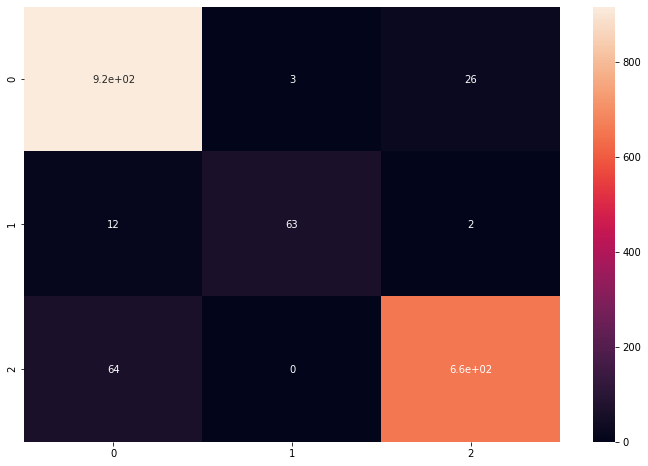

In [61]:
KNC.fit(x_train,y_train)
pred=KNC.predict(x_test)
print("Accuracy score is:",accuracy_score(y_test,pred))
print("\n")
print("Cross_val_score is:",cross_val_score(KNC,x,y,cv=10).mean())
print("\n")
print("Multiclass_roc_auc_score is:",multiclass_roc_auc_score(y_test,pred))
print("\n")
print("Classification_report")
print(classification_report(y_test,pred))
print("\n")
print("Confusion_matirx")
cm=confusion_matrix(y_test,pred)
plt.figure(figsize=(12,8))
sns.heatmap(cm,annot=True)
print(cm)

#### Support Vector Classifier

Accuracy score is: 0.9804934021801491


Cross_val_score is: 0.9754373861110819


Multiclass_roc_auc_score is: 0.9699404731866031


Classification_report
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       945
           1       0.96      0.88      0.92        77
           2       0.98      0.99      0.98       721

    accuracy                           0.98      1743
   macro avg       0.97      0.95      0.96      1743
weighted avg       0.98      0.98      0.98      1743



Confusion_matirx
[[924   3  18]
 [  9  68   0]
 [  4   0 717]]


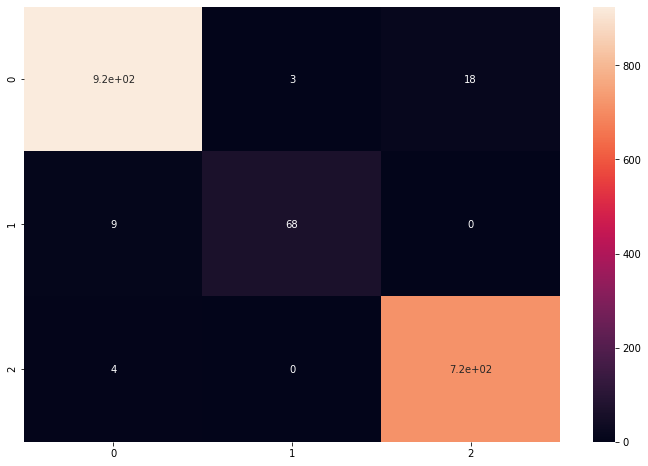

In [62]:
SVC.fit(x_train,y_train)
pred=SVC.predict(x_test)
print("Accuracy score is:",accuracy_score(y_test,pred))
print("\n")
print("Cross_val_score is:",cross_val_score(SVC,x,y,cv=10).mean())
print("\n")
print("Multiclass_roc_auc_score is:",multiclass_roc_auc_score(y_test,pred))
print("\n")
print("Classification_report")
print(classification_report(y_test,pred))
print("\n")
print("Confusion_matirx")
cm=confusion_matrix(y_test,pred)
plt.figure(figsize=(12,8))
sns.heatmap(cm,annot=True)
print(cm)

#### Decision Tree Classifier

Accuracy score is: 0.985083189902467


Cross_val_score is: 0.9825539293651714


Multiclass_roc_auc_score is: 0.9736511778009814


Classification_report
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       945
           1       0.83      0.88      0.86        77
           2       1.00      1.00      1.00       721

    accuracy                           0.99      1743
   macro avg       0.94      0.95      0.95      1743
weighted avg       0.99      0.99      0.99      1743



Confusion_matirx
[[929  14   2]
 [  9  68   0]
 [  1   0 720]]


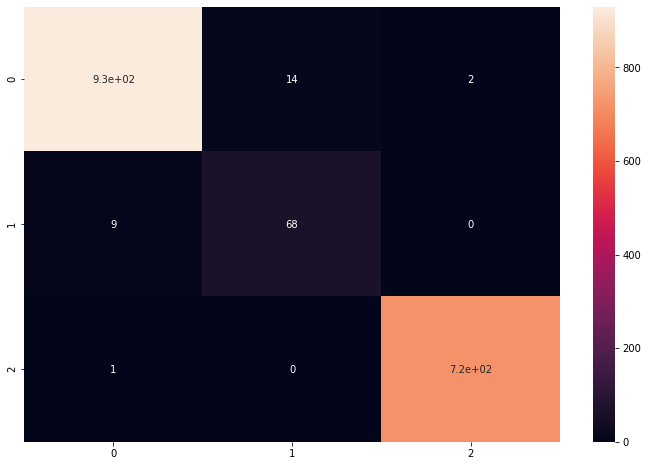

In [63]:
DTC.fit(x_train,y_train)
pred=DTC.predict(x_test)
print("Accuracy score is:",accuracy_score(y_test,pred))
print("\n")
print("Cross_val_score is:",cross_val_score(DTC,x,y,cv=10).mean())
print("\n")
print("Multiclass_roc_auc_score is:",multiclass_roc_auc_score(y_test,pred))
print("\n")
print("Classification_report")
print(classification_report(y_test,pred))
print("\n")
print("Confusion_matirx")
cm=confusion_matrix(y_test,pred)
plt.figure(figsize=(12,8))
sns.heatmap(cm,annot=True)
print(cm)

#### Gaussian Naive Bayes

Accuracy score is: 0.9713138267355135


Cross_val_score is: 0.9686640895733047


Multiclass_roc_auc_score is: 0.9717614130911971


Classification_report
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       945
           1       0.68      0.92      0.78        77
           2       0.99      0.98      0.99       721

    accuracy                           0.97      1743
   macro avg       0.89      0.96      0.91      1743
weighted avg       0.98      0.97      0.97      1743



Confusion_matirx
[[918  23   4]
 [  6  71   0]
 [  6  11 704]]


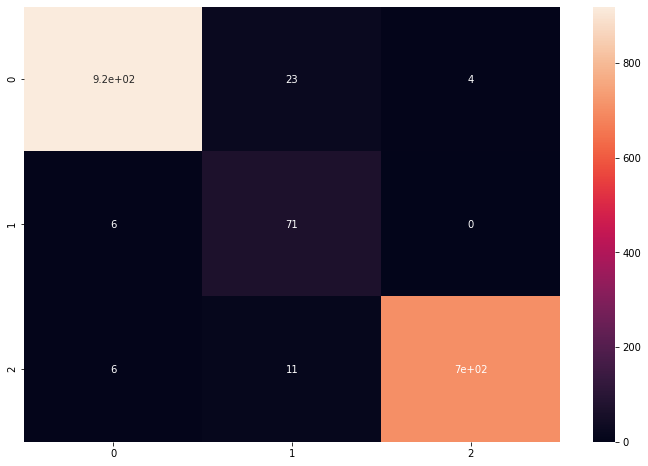

In [64]:
GNB.fit(x_train,y_train)
pred=GNB.predict(x_test)
print("Accuracy score is:",accuracy_score(y_test,pred))
print("\n")
print("Cross_val_score is:",cross_val_score(GNB,x,y,cv=10).mean())
print("\n")
print("Multiclass_roc_auc_score is:",multiclass_roc_auc_score(y_test,pred))
print("\n")
print("Classification_report")
print(classification_report(y_test,pred))
print("\n")
print("Confusion_matirx")
cm=confusion_matrix(y_test,pred)
plt.figure(figsize=(12,8))
sns.heatmap(cm,annot=True)
print(cm)

#### Random Forest Classifier

Accuracy score is: 0.9885255306942053


Cross_val_score is: 0.9881785936232739


Multiclass_roc_auc_score is: 0.9690562978327111


Classification_report
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       945
           1       0.94      0.84      0.89        77
           2       0.99      1.00      1.00       721

    accuracy                           0.99      1743
   macro avg       0.97      0.95      0.96      1743
weighted avg       0.99      0.99      0.99      1743



Confusion_matirx
[[937   4   4]
 [ 12  65   0]
 [  0   0 721]]


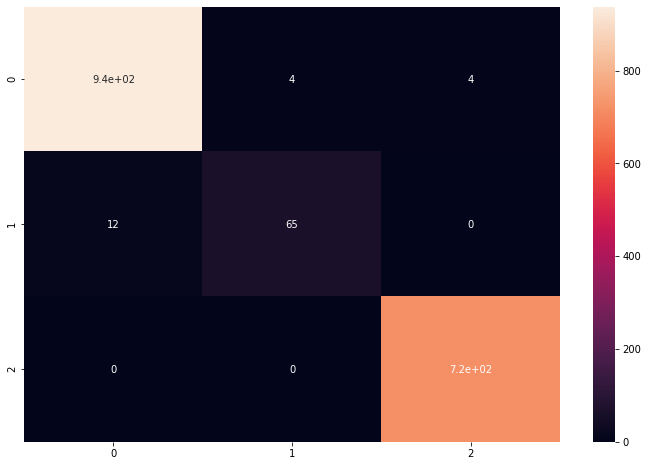

In [65]:
RFC.fit(x_train,y_train)
pred=RFC.predict(x_test)
print("Accuracy score is:",accuracy_score(y_test,pred))
print("\n")
print("Cross_val_score is:",cross_val_score(RFC,x,y,cv=10).mean())
print("\n")
print("Multiclass_roc_auc_score is:",multiclass_roc_auc_score(y_test,pred))
print("\n")
print("Classification_report")
print(classification_report(y_test,pred))
print("\n")
print("Confusion_matirx")
cm=confusion_matrix(y_test,pred)
plt.figure(figsize=(12,8))
sns.heatmap(cm,annot=True)
print(cm)

#### Gradient Boosting Classifier

Accuracy score is: 0.9713138267355135


Cross_val_score is: 0.9686640895733047


Multiclass_roc_auc_score is: 0.9717614130911971


Classification_report
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       945
           1       0.68      0.92      0.78        77
           2       0.99      0.98      0.99       721

    accuracy                           0.97      1743
   macro avg       0.89      0.96      0.91      1743
weighted avg       0.98      0.97      0.97      1743



Confusion_matirx
[[918  23   4]
 [  6  71   0]
 [  6  11 704]]


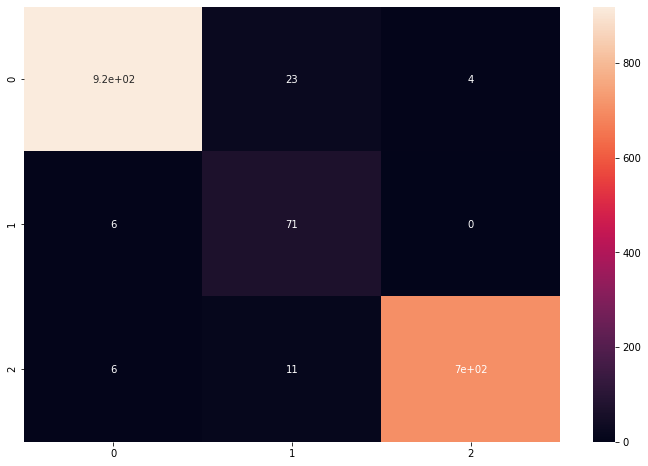

In [66]:
GNB.fit(x_train,y_train)
pred=GNB.predict(x_test)
print("Accuracy score is:",accuracy_score(y_test,pred))
print("\n")
print("Cross_val_score is:",cross_val_score(GNB,x,y,cv=10).mean())
print("\n")
print("Multiclass_roc_auc_score is:",multiclass_roc_auc_score(y_test,pred))
print("\n")
print("Classification_report")
print(classification_report(y_test,pred))
print("\n")
print("Confusion_matirx")
cm=confusion_matrix(y_test,pred)
plt.figure(figsize=(12,8))
sns.heatmap(cm,annot=True)
print(cm)

#### AdaBoost Classifer

Accuracy score is: 0.9300057372346529


Cross_val_score is: 0.8451509653567026


Multiclass_roc_auc_score is: 0.7980541673522964


Classification_report
              precision    recall  f1-score   support

           0       0.89      0.99      0.94       945
           1       0.00      0.00      0.00        77
           2       0.99      0.95      0.97       721

    accuracy                           0.93      1743
   macro avg       0.63      0.65      0.64      1743
weighted avg       0.89      0.93      0.91      1743



Confusion_matirx
[[939   0   6]
 [ 77   0   0]
 [ 39   0 682]]


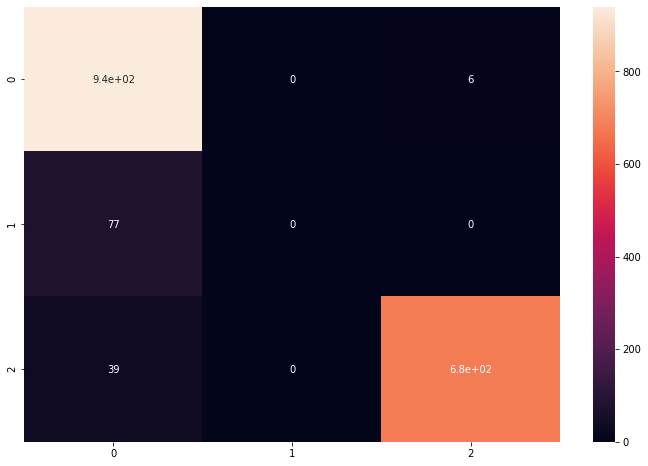

In [67]:
ABC.fit(x_train,y_train)
pred=ABC.predict(x_test)
print("Accuracy score is:",accuracy_score(y_test,pred))
print("\n")
print("Cross_val_score is:",cross_val_score(ABC,x,y,cv=10).mean())
print("\n")
print("Multiclass_roc_auc_score is:",multiclass_roc_auc_score(y_test,pred))
print("\n")
print("Classification_report")
print(classification_report(y_test,pred))
print("\n")
print("Confusion_matirx")
cm=confusion_matrix(y_test,pred)
plt.figure(figsize=(12,8))
sns.heatmap(cm,annot=True)
print(cm)

#### ExtraTrees Classifier

Accuracy score is: 0.9873780837636259


Cross_val_score is: 0.983702034990889


Multiclass_roc_auc_score is: 0.970046568862985


Classification_report
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       945
           1       0.96      0.86      0.90        77
           2       0.99      1.00      0.99       721

    accuracy                           0.99      1743
   macro avg       0.98      0.95      0.96      1743
weighted avg       0.99      0.99      0.99      1743



Confusion_matirx
[[937   3   5]
 [ 11  66   0]
 [  3   0 718]]


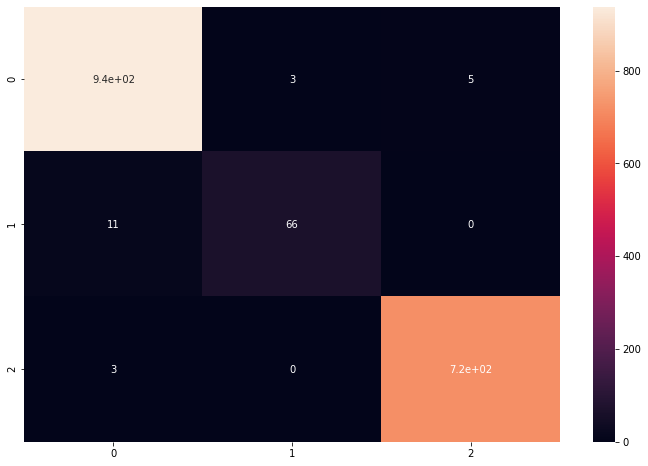

In [68]:
ETC.fit(x_train,y_train)
pred=ETC.predict(x_test)
print("Accuracy score is:",accuracy_score(y_test,pred))
print("\n")
print("Cross_val_score is:",cross_val_score(ETC,x,y,cv=10).mean())
print("\n")
print("Multiclass_roc_auc_score is:",multiclass_roc_auc_score(y_test,pred))
print("\n")
print("Classification_report")
print(classification_report(y_test,pred))
print("\n")
print("Confusion_matirx")
cm=confusion_matrix(y_test,pred)
plt.figure(figsize=(12,8))
sns.heatmap(cm,annot=True)
print(cm)

### Framing Compare Table

In [69]:
Model=[]
ac=[]
cvs=[]
ras=[]
for name,model in models:
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    ac.append(accuracy_score(y_test, y_pred))
    re=cross_val_score(model,x,y,cv=10,scoring="accuracy").mean()
    ras.append(multiclass_roc_auc_score(y_test,y_pred))
    cvs.append(re)
    Model.append(name)
result=pd.DataFrame({"Model":Model,"Accuracy_score":ac,"cross_val_score":cvs,"Roc_auc_score":ras})
result

,Model,Accuracy_score,cross_val_score,Roc_auc_score
0,SVC,0.980493,0.975437,0.969940
1,GaussianNB,0.971314,0.968664,0.971761
2,DecisionTreeClassifier,0.984509,0.983587,0.967147
3,KNeighborsClassifier,0.938612,0.925394,0.929049
4,AdaBoostClassifier,0.930006,0.845151,0.798054
5,RandomForestClassifier,0.990820,0.988408,0.976453
6,GradientBoostingClassifier,0.989673,0.989555,0.982317
7,ExtraTreesClassifier,0.987378,0.983931,0.970311


### HyperParameter Tuning

In [71]:
from sklearn.model_selection import GridSearchCV
parameterRFC={"n_estimators":[20,30,40,50,60,70,80,90,100],
             "criterion":["gini","entropy"],
             "max_features":["auto","sqrt","log2"],
             "max_depth":[2,3,4,5,6,None]}
gridRFC=GridSearchCV(RFC,param_grid=parameterRFC,n_jobs=-1,cv=10)
gridRFC.fit(x_train,y_train)
gridRFC.best_score_,gridRFC.best_params_

(0.9889526542324247,
 {'criterion': 'gini',
  'max_depth': None,
  'max_features': 'log2',
  'n_estimators': 50})

### Using Best Parameter

In [72]:
RFC=RandomForestClassifier(criterion="gini",max_depth=None,max_features="log2",n_estimators=50)
RFC.fit(x_train,y_train)
score=cross_val_score(RFC,x,y,cv=10,scoring="accuracy").mean()
score

0.9884079514214392

### Saving Model

In [73]:
import joblib
joblib.dump(RFC,"Model_Space_RFC.csv")

['Model_Space_RFC.csv']

### Loading Model

In [74]:
Model_Space_RFC=joblib.load("Model_Space_RFC.csv")

### Using Model

In [75]:
Model_Space_RFC.predict(x_test)

array([0, 0, 0, ..., 0, 2, 0])